IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

DJERFAF Ilyes\
TAFOUGHALT Anyes

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes

In [2]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

# Fonction utils : 
## sans faire le 'from iads import utils'

In [5]:
from iads import Classifiers as Classif
import matplotlib.pyplot as plt
import random

In [6]:
# genere_dataset_uniform:
def genere_dataset_uniform(p, n, binf=-1, bsup=1):
    """ int * int * float^2 -> tuple[ndarray, ndarray]
        Hyp: n est pair
        p: nombre de dimensions de la description
        n: nombre d'exemples de chaque classe
        les valeurs générées uniformément sont dans [binf,bsup]
    """
    t1 = np.random.uniform(binf, bsup, (2*n, p))
    t2 = np.asarray([-1 for i in range(0, n)] + [+1 for i in range(0, n)])
    return t1, t2


# genere_dataset_gaussian:
def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    """ les valeurs générées suivent une loi normale
        rend un tuple (data_desc, data_labels)
    """
    exemple_classe_negative = np.random.multivariate_normal(
        negative_center, negative_sigma, nb_points)

    exemple_classe_positive = np.random.multivariate_normal(
        positive_center, positive_sigma, nb_points)

    t1 = np.vstack((exemple_classe_negative, exemple_classe_positive))
    t2 = np.asarray([-1 for i in range(0, nb_points)] +
                    [+1 for i in range(0, nb_points)])
    return t1, t2


# plot2DSet:
def plot2DSet(desc, labels):
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    # Extraction des exemples de classe -1:
    data_negatifs = desc[labels == -1]
    # Extraction des exemples de classe +1:
    data_positifs = desc[labels == +1]

    # Affichage de l'ensemble des exemples :
    # 'o' rouge pour la classe -1
    plt.scatter(data_negatifs[:, 0],
                data_negatifs[:, 1], marker='o', color="red")
    plt.scatter(data_positifs[:, 0], data_positifs[:, 1],
                marker='x', color="blue")  # 'x' bleu pour la classe +1


# plot_frontiere:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax = desc_set.max(0)
    mmin = desc_set.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(
        mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1),
                     x2grid.reshape(x2grid.size, 1)))

    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i, :]) for i in range(len(grid))])
    res = res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid, x2grid, res, colors=[
                 "darksalmon", "skyblue"], levels=[-1000, 0, 1000])


def create_XOR(n, var):
    """ int * float -> tuple[ndarray, ndarray]
        Hyp: n et var sont positifs
        n: nombre de points voulus
        var: variance sur chaque dimension
    """
    cov = [[var, 0], [0, var]]
    mean = [[0, 0], [1, 0], [1, 1], [0, 1]]
    #on
    classe_negative_1 = np.random.multivariate_normal(mean[0], cov, n)
    classe_positive_1 = np.random.multivariate_normal(mean[1], cov, n)
    classe_negative_2 = np.random.multivariate_normal(mean[2], cov, n)
    classe_positive_2 = np.random.multivariate_normal(mean[3], cov, n)
    t1 = np.vstack((classe_negative_1, classe_negative_2,
                    classe_positive_1, classe_positive_2))
    t2 = np.asarray([-1 for i in range(0, 2 * n)] +
                    [+1 for i in range(0, 2 * n)])
    return t1, t2

# ------------------------ A COMPLETER


def genere_train_test(desc_set, label_set, n_pos, n_neg):
    """ permet de générer une base d'apprentissage et une base de test
        desc_set: ndarray avec des descriptions
        label_set: ndarray avec les labels correspondants
        n_pos: nombre d'exemples de label +1 à mettre dans la base d'apprentissage
        n_neg: nombre d'exemples de label -1 à mettre dans la base d'apprentissage
        Hypothèses: 
           - desc_set et label_set ont le même nombre de lignes)
           - n_pos et n_neg, ainsi que leur somme, sont inférieurs à n (le nombre d'exemples dans desc_set)
    """
    n = desc_set.shape[0]
    index_neg = [i for i in range(n) if label_set[i] == -1]
    index_pos = [i for i in range(n) if label_set[i] == 1]
    index_pos_train = random.sample(index_pos, n_pos)
    index_neg_train = random.sample(index_neg, n_neg)

    train_desc = np.concatenate(
        (desc_set[index_pos_train], desc_set[index_neg_train]))
    train_label = np.concatenate(
        (label_set[index_pos_train], label_set[index_neg_train]))

    index_pos_test = [i for i in index_pos if i not in index_pos_train]
    index_neg_test = [i for i in index_neg if i not in index_neg_train]

    test_desc = np.concatenate(
        (desc_set[index_pos_test], desc_set[index_neg_test]))
    test_label = np.concatenate(
        (label_set[index_pos_test], label_set[index_neg_test]))

    return (train_desc, train_label), (test_desc, test_label)


def crossval_strat(X, Y, n_iterations, iteration):
    index_pos = [i for i in range(len(Y)) if Y[i] == 1]
    index_neg = [i for i in range(len(Y)) if Y[i] == -1]

    index_pos_test = index_pos[iteration*(len(index_pos) // n_iterations): (
        iteration+1)*(len(index_pos) // n_iterations)]
    index_neg_test = index_neg[iteration*(len(index_neg) // n_iterations): (
        iteration+1)*(len(index_neg) // n_iterations)]

    Xtest = np.concatenate((X[index_neg_test], X[index_pos_test]))
    Ytest = np.concatenate((Y[index_neg_test], Y[index_pos_test]))

    #index_pos_app =  index_pos[:iteration*(len(index_pos) // n_iterations )] + index_pos[(iteration+1)*(len(index_pos) // n_iterations ) :]
    #index_neg_app = index_neg[:iteration*(len(index_neg) // n_iterations)] + index_neg[(iteration+1)*(len(index_neg) // n_iterations ) :]
    index_app = [i for i in range(len(Y)) if (
        (i not in index_pos_test) and (i not in index_neg_test))]

    Xapp = X[index_app]
    Yapp = Y[index_app]
    return Xapp, Yapp, Xtest, Ytest

# Dataset : data-2D.pkl

## Expérimentation KNN

### Variation de K

In [7]:
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10
for k in range(1,70,16):
    classifierKNN = Classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)


KeyboardInterrupt: 

### Ploter les résultats

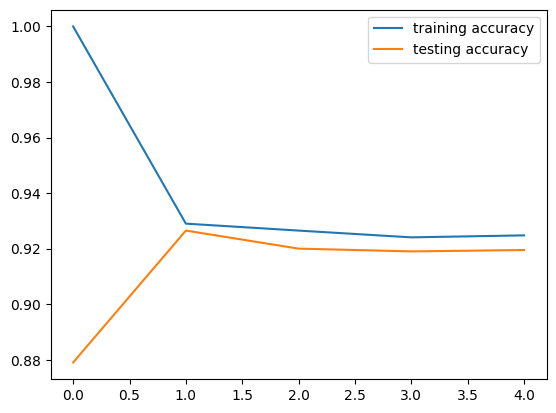

In [ ]:
plt.plot(knn_accuracy_train, label='training accuracy')
plt.plot(knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.show()

In [8]:
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10
for k in range(11, 20, 2):
    classifierKNN = Classif.ClassifierKNN(2, k)
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)


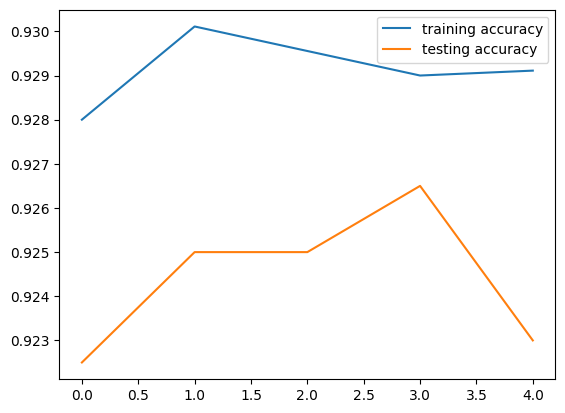

In [9]:
plt.plot(knn_accuracy_train, label='training accuracy')
plt.plot(knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.show()


### Interprétation des résultats

### Conclusion : K-optimal

k = 15, c'est le K optimal

## Expérimentation Perceptron

### Variation de réglage d'initialisation

In [ ]:
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
perceptron_accuracy_test = []
perceptron_accuracy_train = []
niter = 10
for i in range(niter):
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, niter, i)
    # Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
    perceptron = Classif.ClassifierPerceptron(2)
    
for k in range(1, 70, 16):
    print(k)
    
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)

# -----
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Listes qui vont servir à mémoriser les accuracy du perceptron à chaque étape:
train_acc = []
test_acc = []


# Réalisation de N itérations
N = 100
print("Init perceptron w=", perceptron1.w)
for i in range(N):
    perceptron1.train_step(data_train, label_train)
    train_acc.append(perceptron1.accuracy(data_train, label_train))
    test_acc.append(perceptron1.accuracy(data_test, label_test))


# -----
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1, N+1), train_acc, test_acc)
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()

# -----
# Affichage de la frontière de séparation des classes (en prenant tous les exemples de la base)
plot_frontiere(data_gauss_desc, data_gauss_label, perceptron1, step=150)
plot2DSet(data_gauss_desc, data_gauss_label)

print("Accuracy finale (train): ", perceptron1.accuracy(data_train, label_train))
print("Accuracy finale (test) : ", perceptron1.accuracy(data_test, label_test))


### Variation du learning rate

## Expérimentation Perceptron Biais

# Dataset : data-5D.pkl